<a href="https://colab.research.google.com/github/Uma-kanagarajan/Flower_classfication_using_CNN/blob/main/Flower_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


### Introduction of Dataset

This project uses a dataset of several thousand photos of flowers. The flowers dataset contains five sub-directories, one per class:

flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

In [60]:
import pathlib

dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file(origin = dataset_url,
                                   fname = 'flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [61]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


A total of 3670 flowers available in this dataset of 5 categories.


import PIL
import PIL.Image

roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))


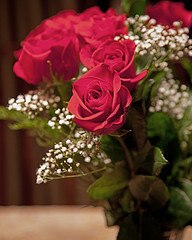

In [62]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[11]))

### Load the data

Define the hyperparameters

In [63]:
#Hyperparameters

batch_size = 32
img_height = 180
img_width = 180


In [64]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset = 'training',
    seed = 123,
    batch_size = batch_size,
    image_size = (img_height, img_width)
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [65]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    batch_size = batch_size,
    image_size = (img_height, img_width)
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [66]:
#You can find the class names in the class_names attribute on these datasets.

class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### Visualize the data


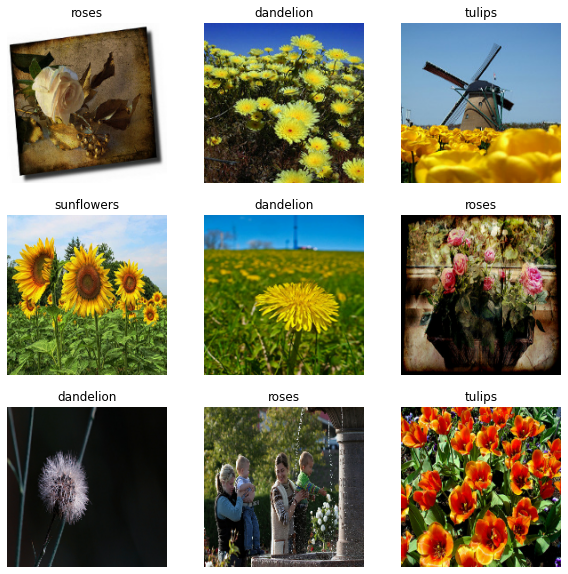

In [67]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Modelling

In [12]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [13]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [15]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
92/92 [==============================] - 110s 1s/step - loss: 6.7974 - accuracy: 0.2173 - val_loss: 6.5665 - val_accuracy: 0.2139
Epoch 2/10
92/92 [==============================] - 106s 1s/step - loss: 6.7257 - accuracy: 0.2187 - val_loss: 6.5665 - val_accuracy: 0.2139
Epoch 3/10
92/92 [==============================] - 105s 1s/step - loss: 6.7257 - accuracy: 0.2187 - val_loss: 6.5665 - val_accuracy: 0.2139
Epoch 4/10
92/92 [==============================] - 107s 1s/step - loss: 6.7257 - accuracy: 0.2187 - val_loss: 6.5665 - val_accuracy: 0.2139
Epoch 5/10
92/92 [==============================] - 112s 1s/step - loss: 6.7257 - accuracy: 0.2187 - val_loss: 6.5665 - val_accuracy: 0.2139
Epoch 6/10
92/92 [==============================] - 108s 1s/step - loss: 6.7257 - accuracy: 0.2187 - val_loss: 6.5665 - val_accuracy: 0.2139
Epoch 7/10
92/92 [==============================] - 107s 1s/step - loss: 6.7257 - accuracy: 0.2187 - val_loss: 6.5665 - val_accuracy: 0.2139
Epoch 8/10
92

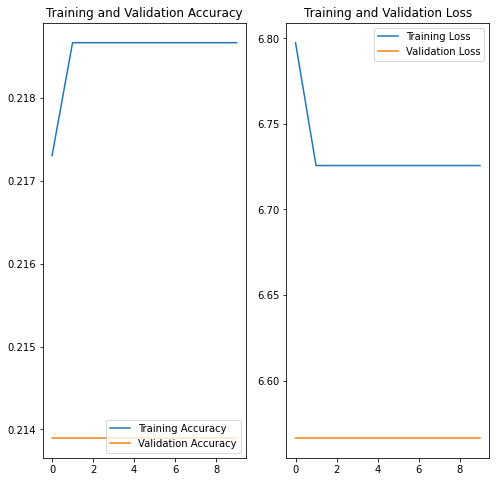

In [17]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

### Data Augmentation

In [68]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times:

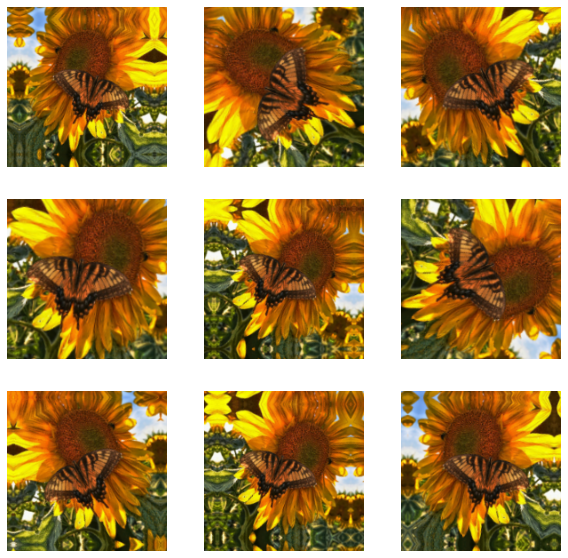

In [69]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Dropout

Another technique to reduce overfitting is to introduce dropout regularization to the network.

In [70]:
num_classes = 5

model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [74]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs = epochs
)

Epoch 1/25
92/92 [==============================] - 120s 1s/step - loss: 0.8479 - accuracy: 0.6764 - val_loss: 0.8431 - val_accuracy: 0.6458
Epoch 2/25
92/92 [==============================] - 120s 1s/step - loss: 0.8202 - accuracy: 0.6880 - val_loss: 0.8186 - val_accuracy: 0.6676
Epoch 3/25
92/92 [==============================] - 121s 1s/step - loss: 0.7786 - accuracy: 0.7003 - val_loss: 0.7685 - val_accuracy: 0.7030
Epoch 4/25
92/92 [==============================] - 120s 1s/step - loss: 0.7616 - accuracy: 0.7108 - val_loss: 0.9646 - val_accuracy: 0.6499
Epoch 5/25
92/92 [==============================] - 120s 1s/step - loss: 0.7486 - accuracy: 0.7088 - val_loss: 0.8684 - val_accuracy: 0.6621
Epoch 6/25
92/92 [==============================] - 120s 1s/step - loss: 0.7334 - accuracy: 0.7224 - val_loss: 0.7688 - val_accuracy: 0.6962
Epoch 7/25
92/92 [==============================] - 120s 1s/step - loss: 0.7109 - accuracy: 0.7289 - val_loss: 0.8654 - val_accuracy: 0.6839
Epoch 8/25
92

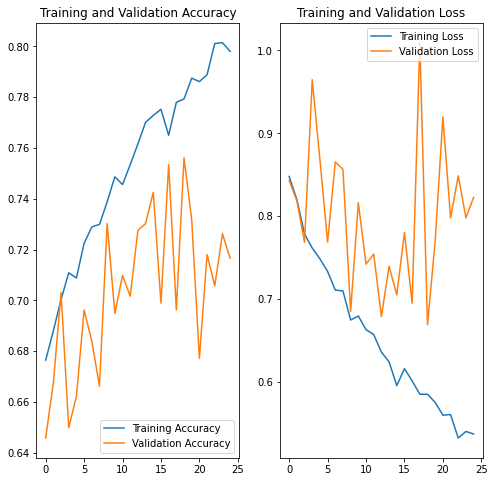

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()